In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# PSO Reasearch

## Introduction

Swarm Intelligence is a branch of artificial intelligence and computational science inspired by the collective behavior of social organisms, such as ants, bees, and birds. These algorithms are designed to solve complex problems by simulating the interactions and cooperation observed in natural swarms. Here are some key concepts related to Swarm Intelligence algorithms:

- Ant Colony Optimization (ACO): ACO algorithms are inspired by the foraging behavior of ants. They are often used to solve optimization problems, like the traveling salesman problem. Virtual ants deposit pheromones on paths, and the probability of choosing a path is influenced by the amount of pheromone.

- Particle Swarm Optimization (PSO): PSO is based on the social behavior of birds and fish. Particles in the algorithm move through a solution space, adjusting their positions based on their own best results and the best results found by their neighbors.

- Bee Colony Optimization: This algorithm simulates the foraging behavior of honeybees. Bees explore different solutions, share information with other bees, and choose the best solution based on the quality of nectar sources.

- Firefly Algorithm: Inspired by the flashing behavior of fireflies, this algorithm is used for optimization problems. Fireflies are attracted to each other's light, and this attraction is used to converge toward optimal solutions.

- Artificial Bee Colony (ABC): ABC algorithms are based on the foraging behavior of honeybees. Bees explore and communicate food sources, and the algorithm uses this behavior for optimization problems.

- Swarm Robotics: In addition to optimization, swarm intelligence principles are applied to robotics. Multiple robots work together, often autonomously, to achieve a common goal, such as exploration or environmental monitoring.

These algorithms are particularly useful for solving complex, dynamic, and non-linear problems. They leverage the power of population-based methods and the ability to search vast solution spaces efficiently. Swarm Intelligence algorithms have found applications in fields like optimization, routing, and even financial forecasting.

## PSO procedure

Particle Swarm Optimization (PSO) to minimize a generic function F(x, y). Here's a high-level explanation of how you can apply PSO to this optimization problem:


1. Initialization:
 - Initialize a population of particles, where each particle represents a potential solution in the form of a position in the search space. In your case, each particle will have two dimensions (x, y).
 - Randomly initialize the position and velocity of each particle.
 - Define the fitness of each particle as F(x, y), the value of the function to be minimized.


2. Optimization Process:
 - Define two best positions for each particle:
   - Personal Best (pBest): The best position the particle has found so far.
   - Global Best (gBest): The best position among all particles in the swarm.
 - Update the particle's velocity and position based on its pBest and gBest:
   - Velocity Update: Adjust the particle's velocity using its current velocity, pBest, and gBest to explore the search space efficiently.
   - Position Update: Update the particle's position based on its new velocity.
 - Evaluate the fitness of the new position, i.e., compute F(x, y) for the new position.


3. Termination Criteria:
 - The optimization process continues for a specified number of iterations or until a termination condition is met, such as reaching a target fitness value or a time limit.


4. Solution Retrieval:
 - Once the optimization process is complete, the gBest position represents the optimal solution (minimum) for the function F(x, y).


PSO leverages the collective behavior of particles to explore the search space effectively. By adjusting the particle velocities and positions based on the best solutions they have encountered (pBest) and the best solution within the entire swarm (gBest), PSO aims to converge towards the optimal solution of the function F(x, y).

Keep in mind that the success of PSO depends on factors like the choice of parameters, swarm size, and the specific characteristics of the function you are trying to minimize. Experimentation and fine-tuning are often necessary to achieve the best results for a given problem.

## References

https://www.geeksforgeeks.org/particle-swarm-optimization-pso-an-overview/

https://www.geeksforgeeks.org/introduction-to-particle-swarm-optimizationpso/

https://www.geeksforgeeks.org/implementation-of-particle-swarm-optimization/

https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-particle-swarm-optimization-algorithm/

https://link.springer.com/article/10.1007/s11831-021-09694-4#Sec10

https://marketbrew.ai/how-particle-swarm-optimization-works-a-step-by-step-guide

# Himmelblau's function

$$
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

In [2]:
# Define Himmelblau's function
def himmelblau(x:float, y:float) -> float:
    """
    Calculate the value of the Himmelblau's function for given x and y.
    Himmelblau's function is a multi-modal function used to test the performance of optimization algorithms.

    Parameters:
        x (float): The x-coordinate.
        y (float): The y-coordinate.

    Returns:
        float: The value of the Himmelblau's function at the given coordinates.
    """
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

mínimos conhecidos:
 - f( 3 , 2) = 0
 - f( -2.805118 , 3.131312) = 0
 - f( -3.779310 , -3.283186) = 0
 - f( 3.584428 , -1.848126) = 0

# Refatorando e Variar Parâmetros

https://numpy.org/doc/stable/reference/routines.linalg.html

## Classes

### Particle

In [3]:
class Particle():
    """Particle class represents a single Particle in the swarm."""
    def __init__(self) -> None:
        self.position = [0.0, 0.0]
        self.velocity = [0.0, 0.0]
        self.personal_best_position = [0.0, 0.0]
        self.personal_best_value = None


    def set_particle_position(self, x:float, y:float) -> None:
        """Set the particle position."""
        self.position = [x, y]

    def set_particle_velocity(self, vx:float, vy:float) -> None:
        """Set the particle vlelocity."""
        self.velocity = [vx, vy]
 
    def evaluate_particle(self) -> float:
        """Evaluate the Particle and return his himmelblau value."""
        return himmelblau(self.position[0], self.position[1])

    def set_personal_best_position(self) -> None:
        """Set the personal best position of Particle."""
        self.personal_best_position = self.position

    def set_personal_best_value(self, value:float) -> None:
        """Set the personal best value of Particle."""
        self.personal_best_value = value

    def generate_particle_value(self) -> float:
        """Based on the Particle position generate his himmelblau value."""
        value = self.evaluate_particle()
        self.set_personal_best_value(value)
        return value

    def initialize_random_particle(self) -> None:
        """Initializes a random particle."""
        self.set_particle_position(random.uniform(-6, 6), random.uniform(-6, 6))
        self.generate_particle_value()
        self.set_personal_best_position()

    def update_personal_best(self) -> None:
        """Update the personal best Particle."""
        if self.value < self.personal_best_value:
            self.set_personal_best_position(self.position)
            self.set_personal_best_value(self.value)

    def inertia_velocity(self, w:float) -> np.ndarray:
        """Return the Inertia velocity fator based on the inertia weight."""
        return np.array([w * self.velocity[0], w * self.velocity[1]])

    def cognitive_influence(self, c1:float) -> np.ndarray:
        """Return the Cognitive velocity fator based on the cognitive weight and a random number.
        c1: Cognitive weight.
        The cognitive learning factor, also known as the self-learning factor, \
        determines the influence of the particle's pbest on its movement. \
        A higher cognitive learning factor will cause the particle to be more influenced \
        by its own past performance, while a lower cognitive learning factor will make the \
        particle more responsive to changes in the search space."""
        r1 = random.random()
        x = c1 * r1 * (self.personal_best_position[0] - self.position[0])
        y = c1 * r1 * (self.personal_best_position[1] - self.position[1])
        return np.array([x, y])

    def social_influence(self, c2:float, global_best_position:list) -> np.ndarray:
        """Return the Social velocity fator based on the social weight and a random number.
        c2: Social weight.
        The social learning factor, also known as the swarm learning factor, \
        determines the influence of the gbest on the movement of the particles.\
        A higher social learning factor will cause the particles to be more influenced \
        by the best position reached by any particle in the swarm, \
        while a lower social learning factor will make the particles more responsive \
        to changes in their local environment."""
        r2 = random.random()
        x = c2 * r2 * (global_best_position[0] - self.position[0])
        y = c2 * r2 * (global_best_position[1] - self.position[1])
        return np.array([x, y])

    def __str__(self) -> str:
        """Return the particle position and value."""
        return f'Particle: Position = {self.position}, Value = {self.personal_best_value}'

    def __repr__(self) -> str:
        """Return the particle position and value."""
        return f'Particle: Position = {self.position}, Value = {self.personal_best_value}'

### PSO

In [4]:
class PSO():
    """Swarm Intelligence algorithm using PSO aproach."""
    def __init__(self, quantity_pop:int, max_interactions:int) -> None:
        self.quantity_pop = quantity_pop
        self.interactions = max_interactions
        self.swarm = []

        self.global_best = None

        self.history = []


    def evaluate_swarm(self) -> None:
        """Evaluate the swarm.
        deprecated: use generate_particle_value() instead and evaluate_particle()."""
        for particle in self.swarm:
            particle.generate_particle_value()

    def get_best_particle(self) -> Particle:
        """Return the best particle in the swarm."""
        return min(self.swarm, key=lambda p: p.personal_best_value)

    def set_global_best(self, particle:Particle) -> None:
        """Set the best particle in the swarm."""
        self.global_best = particle

    def update_global_best(self, particle:Particle) -> None:
        """Update the best particle in the swarm."""
        if particle.personal_best_value < self.global_best.personal_best_value:
            self.set_global_best(particle)

    def initialize_swarm(self) -> None:
        """Initializes the swarm."""
        for _ in range(self.quantity_pop):
            particle = Particle()
            particle.initialize_random_particle()
            self.swarm.append(particle)
        gbest = self.get_best_particle()
        self.set_global_best(gbest)

    def update_particle_velocity(self, particle:Particle, w:float, c1:float, c2:float) -> np.ndarray:
        """Update and Returns the particle velocity.
        w: Inertia weight
        c1: Cognitive parameter
        c2: Social parameter
        uses the particle internal personal and global best for the calculation."""
        new_velocity =  particle.inertia_velocity(w) +\
                        particle.cognitive_influence(c1) +\
                        particle.social_influence(c2, self.global_best.position)
        particle.set_particle_velocity(new_velocity[0], new_velocity[1])
        return new_velocity

    def update_particle_position(self, particle:Particle) -> list:
        """Update and Returns the particle position."""
        new_position = [particle.position[0] + particle.velocity[0],
                        particle.position[1] + particle.velocity[1]]
        particle.set_particle_position(new_position[0], new_position[1])
        return new_position

    def run_pso(self, w:float, c1:float, c2:float) -> None:
        """Execute the PSO algorithm.
        w: Inertia weight
        c1: Cognitive parameter
        c2: Social parameter
        """
        self.initialize_swarm()
        self.history.append(self.get_best_particle())
        for interation in range(self.interactions):
            for particle in self.swarm:

                # Update velocity
                self.update_particle_velocity(particle, w, c1, c2)

                # Update position
                new_position = self.update_particle_position(particle)
                new_value = himmelblau(new_position[0], new_position[1])

                # Update personal best if better solution found
                if new_value < particle.personal_best_value:
                    particle.set_personal_best_position()
                    particle.set_personal_best_value(new_value)

                # Update gBest if better solution found
                if new_value < self.global_best.personal_best_value:
                    self.set_global_best(particle)
            self.history.append(self.get_best_particle())
            print(f'Iteration {interation + 1}: Best Value = {self.global_best.personal_best_value:.6f}')

## Parameter

In [5]:
# PSO parameters
num_particles = 30
max_iterations = 100
c1 = 2.0  # Cognitive parameter
c2 = 2.0  # Social parameter
w = 0.7   # Inertia weight

## Run PSO

In [ ]:
pso = PSO(num_particles, max_iterations)
pso.run_pso(w, c1, c2)
# pso.swarm

In [8]:
pso.get_best_particle()

Particle: Position = [-2.805208325669084, 3.1314243446532415], Value = 3.138581429049088e-08

## Results

## Normal

In [9]:
resultados = []
for x in pso.history:
    resultados.append(x.personal_best_value)

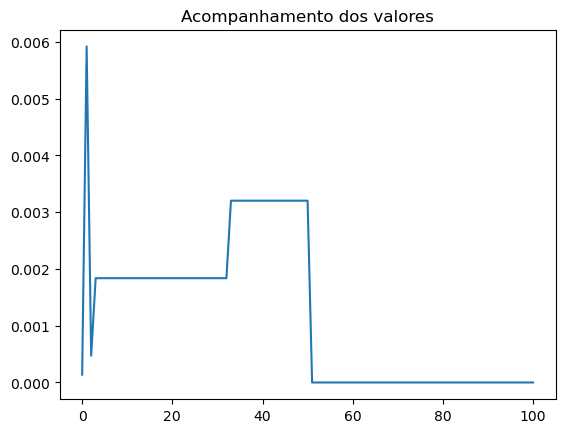

In [10]:
plt.plot(resultados)
plt.title("Acompanhamento dos valores")
plt.show()

## Varying Cognitive Inercia

Iteration 1: Best Value = 5.759975
Iteration 2: Best Value = 2.081762
Iteration 3: Best Value = 2.081762
Iteration 4: Best Value = 2.081762
Iteration 5: Best Value = 2.081762
Iteration 6: Best Value = 2.081762
Iteration 7: Best Value = 2.081762
Iteration 8: Best Value = 2.081762
Iteration 9: Best Value = 2.081762
Iteration 10: Best Value = 2.081762
Iteration 11: Best Value = 2.081762
Iteration 12: Best Value = 2.081762
Iteration 13: Best Value = 2.081762
Iteration 14: Best Value = 2.081762
Iteration 15: Best Value = 2.081762
Iteration 16: Best Value = 2.081762
Iteration 17: Best Value = 2.081762
Iteration 18: Best Value = 2.081762
Iteration 19: Best Value = 2.081762
Iteration 20: Best Value = 2.081762
Iteration 21: Best Value = 2.081762
Iteration 22: Best Value = 2.081762
Iteration 23: Best Value = 2.081762
Iteration 24: Best Value = 2.081762
Iteration 25: Best Value = 2.081762
Iteration 26: Best Value = 2.081762
Iteration 27: Best Value = 2.081762
Iteration 28: Best Value = 2.081762
I

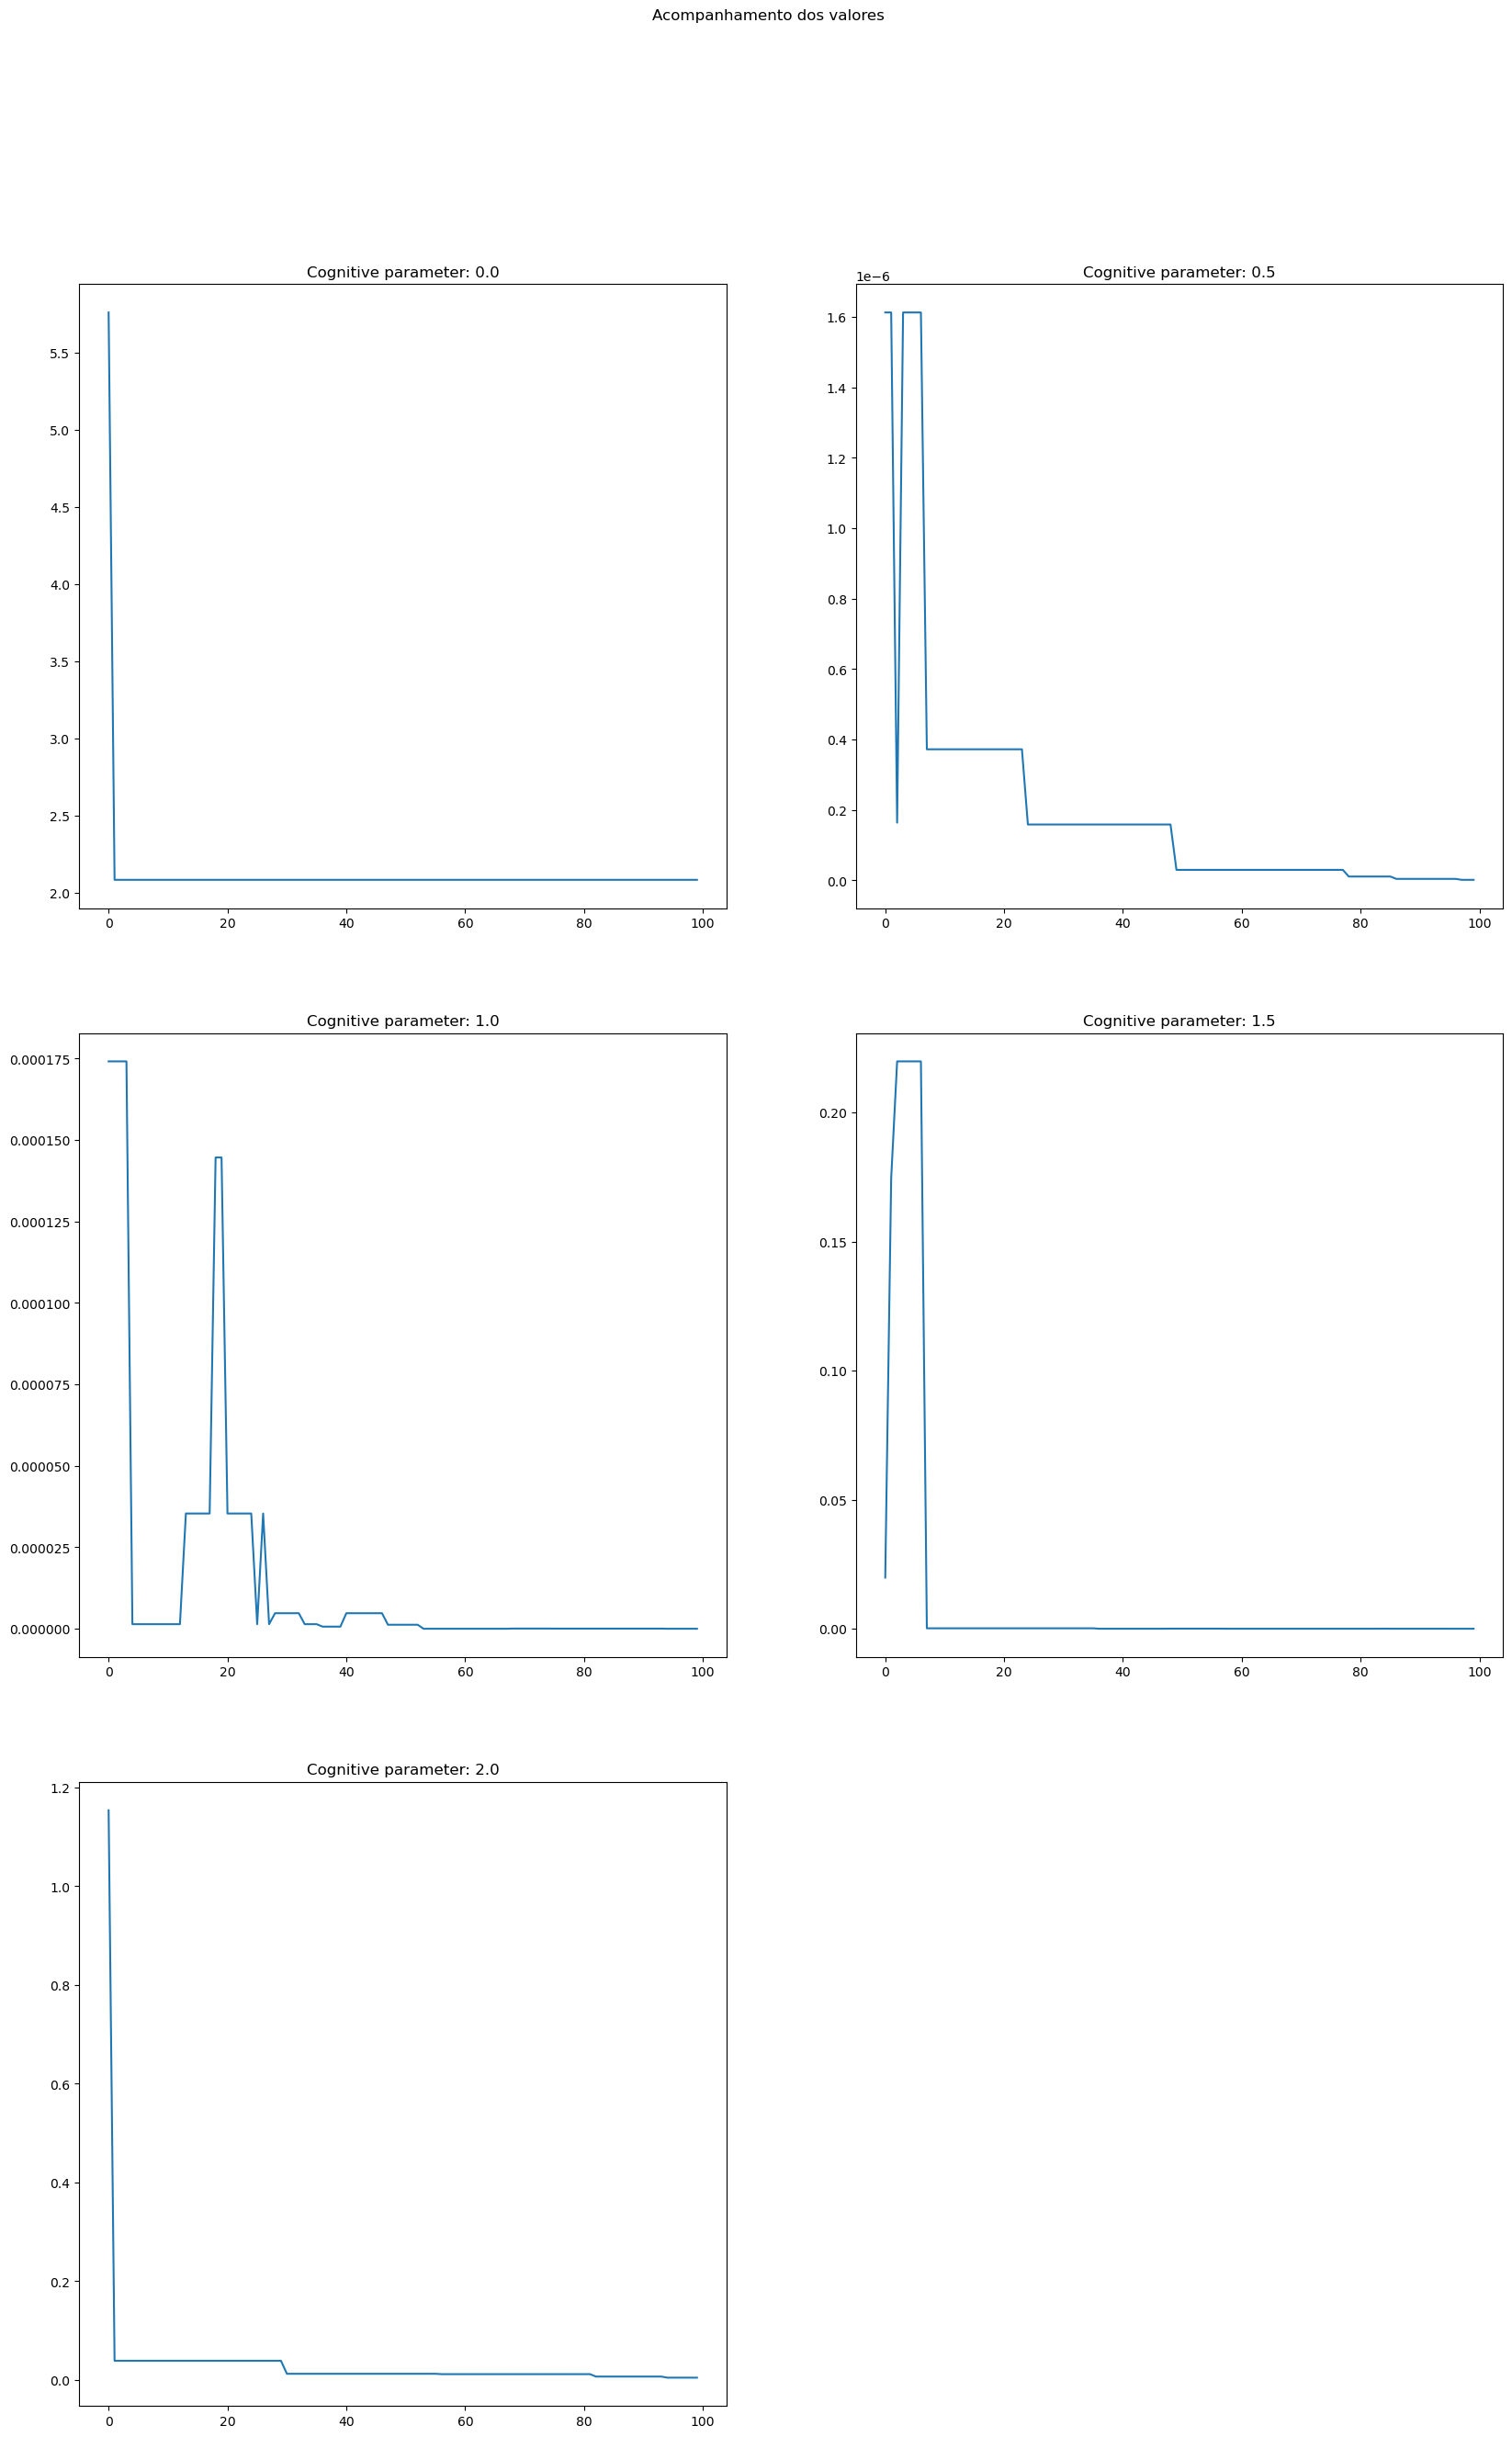

In [14]:
# PSO parameters
num_particles = 30
max_iterations = 100
c1 = [x/2 for x in range(0, 5)]  # Cognitive parameter
c2 = 2.0  # Social parameter
w = 0.7   # Inertia weight
i = 1

fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(20)

for cog in c1:
    pso = PSO(num_particles, max_iterations)
    pso.run_pso(w, cog, c2)
    resultados = []
    for x in pso.history:
        resultados.append(x.personal_best_value)

    resultados.pop(0)
    plt.subplot(3, 2, i)
    plt.plot(resultados)
    plt.title(f"Cognitive parameter: {cog}")
    i += 1

plt.suptitle("Acompanhamento dos valores")
plt.show()

## Varying Social Inercia

Iteration 1: Best Value = 9.419510
Iteration 2: Best Value = 9.419510
Iteration 3: Best Value = 9.419510
Iteration 4: Best Value = 9.419510
Iteration 5: Best Value = 9.419510
Iteration 6: Best Value = 9.419510
Iteration 7: Best Value = 9.419510
Iteration 8: Best Value = 9.419510
Iteration 9: Best Value = 9.419510
Iteration 10: Best Value = 9.419510
Iteration 11: Best Value = 9.419510
Iteration 12: Best Value = 9.419510
Iteration 13: Best Value = 9.419510
Iteration 14: Best Value = 9.419510
Iteration 15: Best Value = 9.419510
Iteration 16: Best Value = 9.419510
Iteration 17: Best Value = 9.419510
Iteration 18: Best Value = 9.419510
Iteration 19: Best Value = 9.419510
Iteration 20: Best Value = 9.419510
Iteration 21: Best Value = 9.419510
Iteration 22: Best Value = 9.419510
Iteration 23: Best Value = 9.419510
Iteration 24: Best Value = 9.419510
Iteration 25: Best Value = 9.419510
Iteration 26: Best Value = 9.419510
Iteration 27: Best Value = 9.419510
Iteration 28: Best Value = 9.419510
I

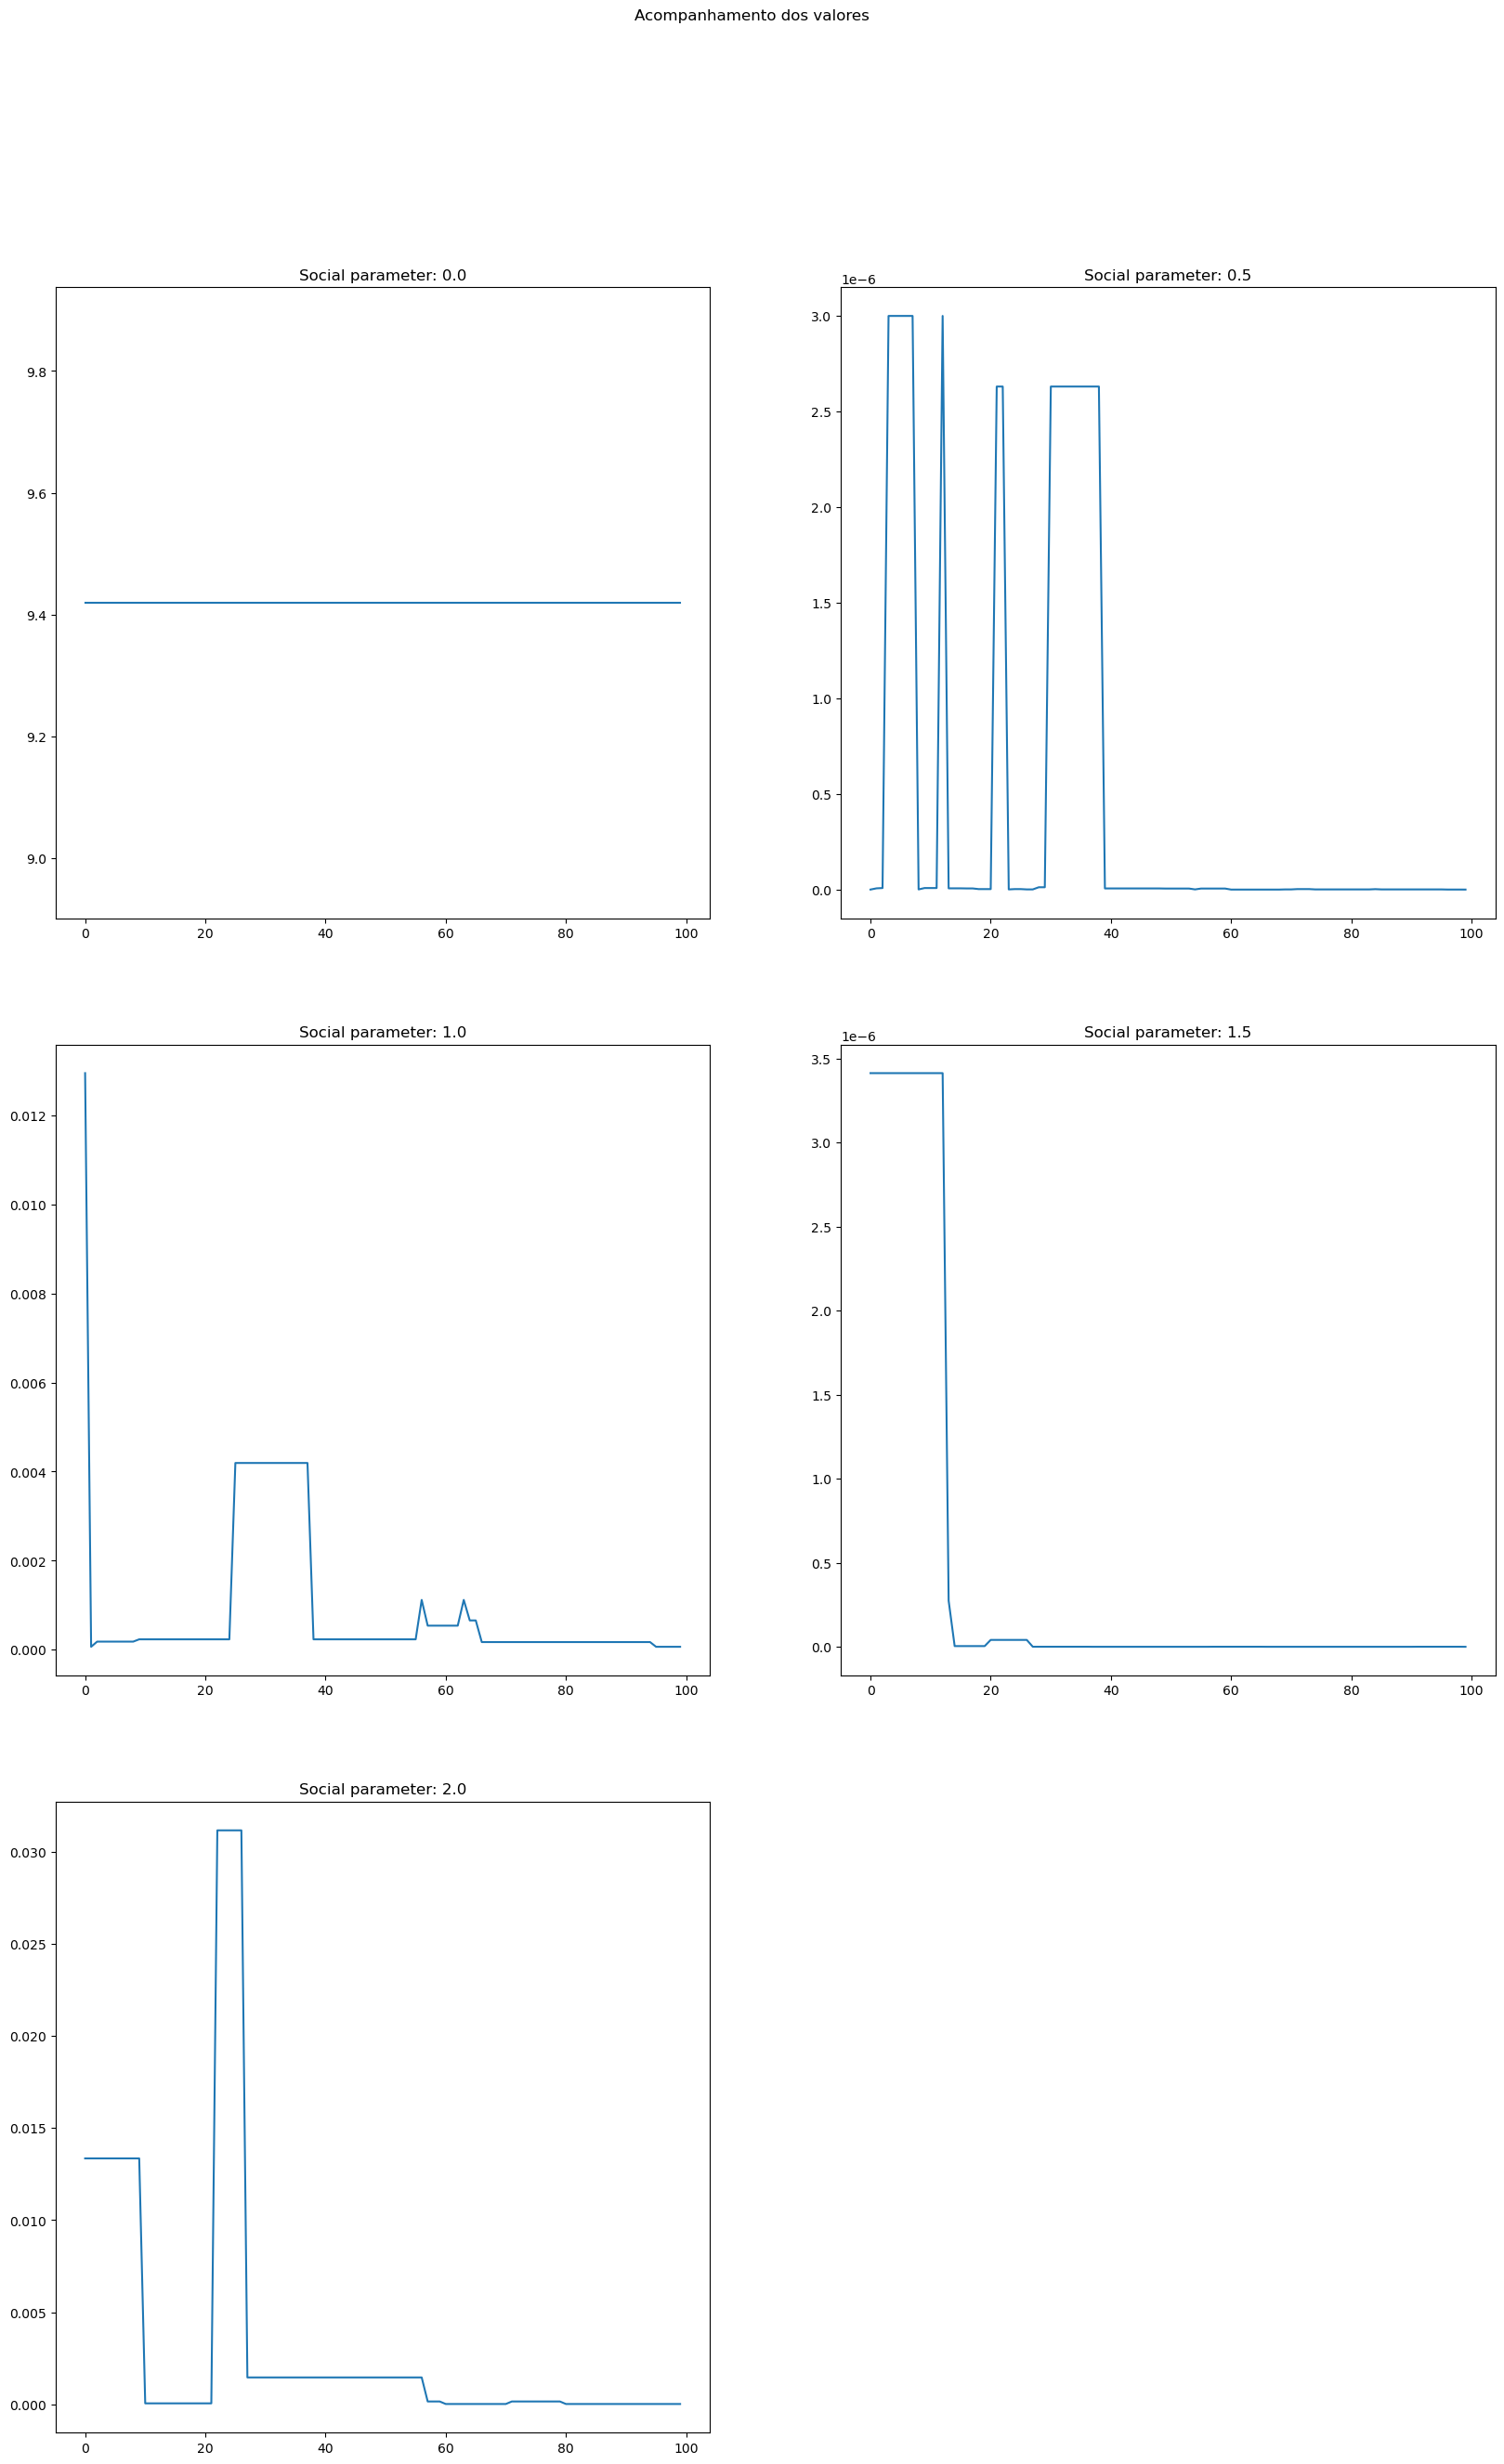

In [16]:
# PSO parameters
num_particles = 30
max_iterations = 100
c1 = 2.0  # Cognitive parameter
c2 = [x/2 for x in range(0, 5)]  # Social parameter
w = 0.7   # Inertia weight
i = 1

fig = plt.figure()
fig.set_figheight(30)
fig.set_figwidth(20)

for soc in c2:
    pso = PSO(num_particles, max_iterations)
    pso.run_pso(w, c1, soc)
    resultados = []
    for x in pso.history:
        resultados.append(x.personal_best_value)

    resultados.pop(0)
    plt.subplot(3, 2, i)
    plt.plot(resultados)
    plt.title(f"Social parameter: {soc}")
    i += 1

plt.suptitle("Acompanhamento dos valores")
plt.show()